Accuracy: 0.8246753246753247


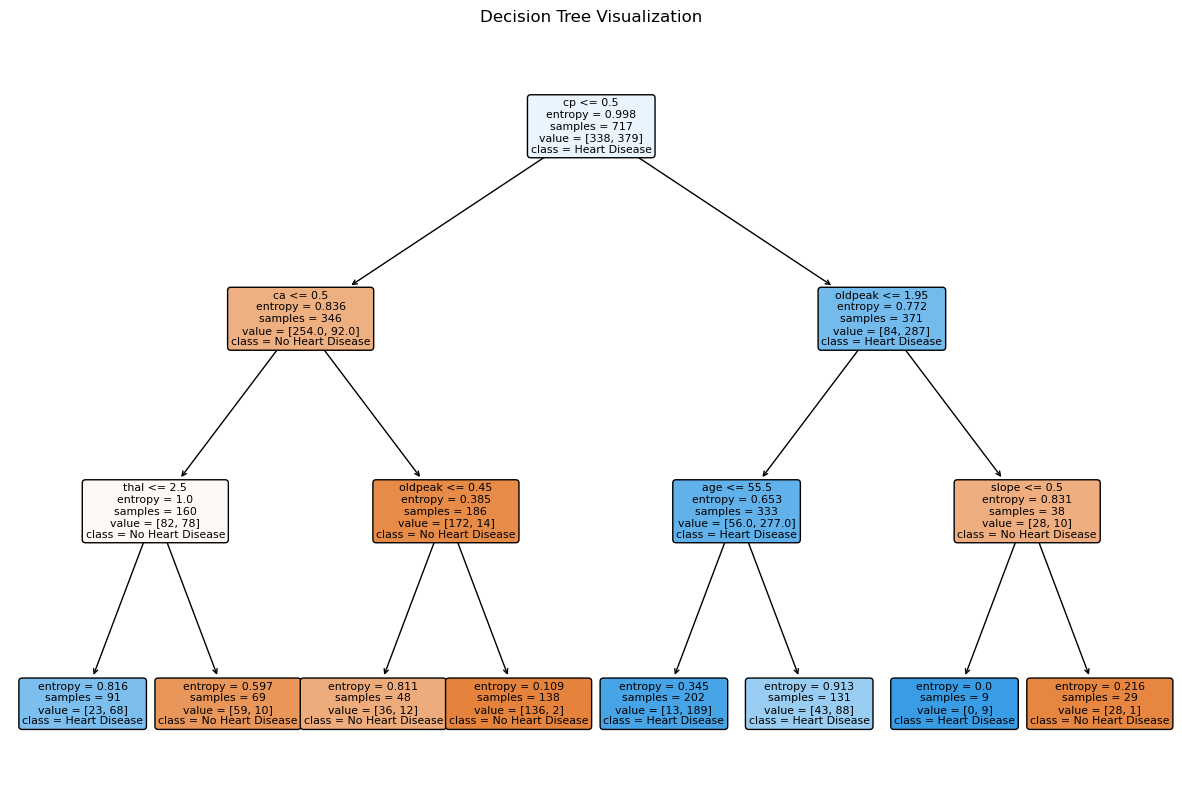

In [5]:
#1a. 1. implementation of decision tree
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
os.chdir("D:\\")
pima=pd.read_csv("heart.csv")
s=pima.copy(deep=True)
X=s.loc[ : ,['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
Y=s.loc[ : ,'target']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
#Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

D:\Users\MY LAP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Model Accuracy (MLPClassifier): 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



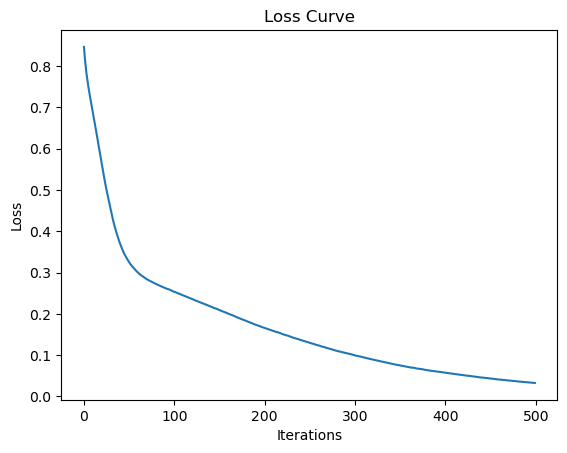

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,  classification_report
file_path = "D:\\heart.csv"
df = pd.read_csv(file_path)
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network Model Accuracy (MLPClassifier): {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Loading the dataset
os.chdir("D:\\")
df = pd.read_csv("heart.csv")

# For demonstration, let's assume 'age' column is treated as text for educational purposes
df['text'] = df['age'].astype(str)  # Convert age to text for this dummy example
df['target'] = df['target']

# Features and target selection
X = df['text']  # Text features
y = df['target']  # Target labels

# Convert text data to feature vectors
vectorizer = CountVectorizer()
X_vectors = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Sample Prediction
sample_text = ["52"]  # Example text for prediction
sample_vector = vectorizer.transform(sample_text)

predicted_class = nb.predict(sample_vector)
print("\nSample Prediction:")
print(f"Predicted Class: {'Heart Disease' if predicted_class[0] == 1 else 'No Heart Disease'}")


Model Accuracy: 65.58%
Precision: 65.60%
Recall: 65.58%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       159
           1       0.64      0.65      0.65       149

    accuracy                           0.66       308
   macro avg       0.66      0.66      0.66       308
weighted avg       0.66      0.66      0.66       308


Sample Prediction:
Predicted Class: Heart Disease
